# 🎓 Student Performance Prediction & Analysis

## Objective
The goal of this project is to analyze student academic data and build a machine learning model to predict whether a student will pass or fail.

## Tools Used
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn
- Google Colab


1. Dataset Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
from google.colab import files
files.upload()

Saving student_data.csv to student_data.csv


{'student_data.csv': b'school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3\nGP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6\nGP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6\nGP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10\nGP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15\nGP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10\nGP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15\nGP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11\nGP,F,17,U,GT

In [4]:
df = pd.read_csv("student_data.csv")


2. Dataset Overview


In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

3. Data Cleaning

In [8]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


4. Target Variable Creation

In [9]:
df["pass_fail"] = df["G3"].apply(lambda x: 1 if x>=10 else 0)

In [10]:
df[["G3","pass_fail"]].head()

,G3,pass_fail
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1


5. Exploratory Data Analysis (EDA)

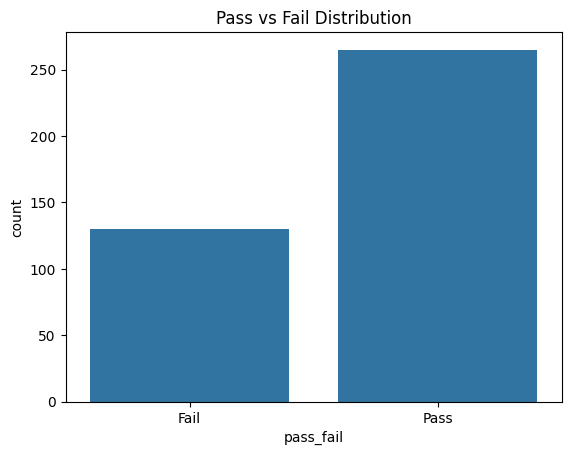

In [11]:
#Pass vs Fail Distribution
sns.countplot(x="pass_fail", data=df)
plt.xticks([0, 1], ["Fail", "Pass"])
plt.title("Pass vs Fail Distribution")
plt.show()


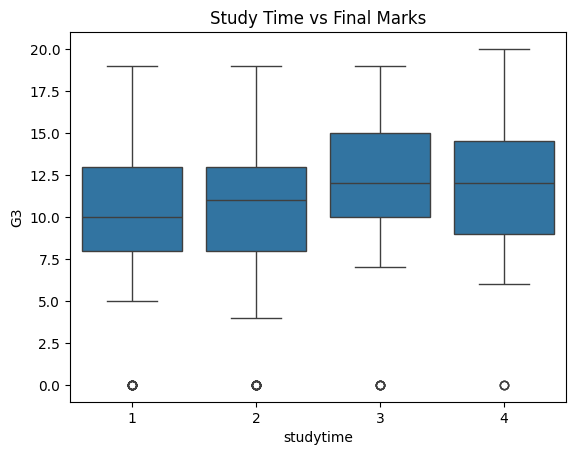

In [12]:
#Study Time vs Performance
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("Study Time vs Final Marks")
plt.show()


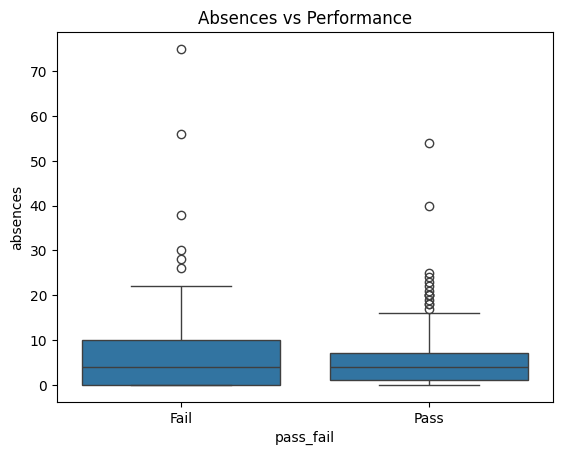

In [13]:
#Absences vs Performance
sns.boxplot(x="pass_fail", y="absences", data=df)
plt.xticks([0, 1], ["Fail", "Pass"])
plt.title("Absences vs Performance")
plt.show()


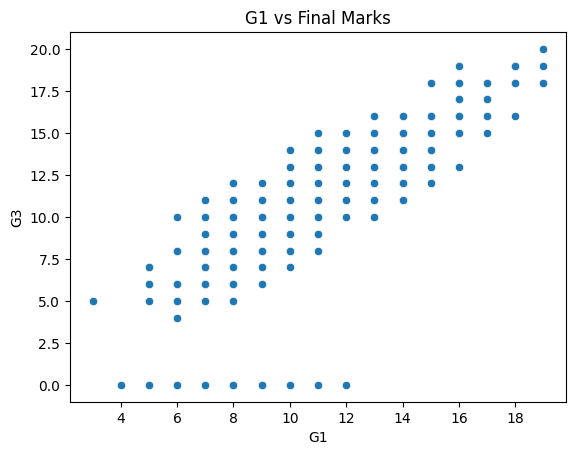

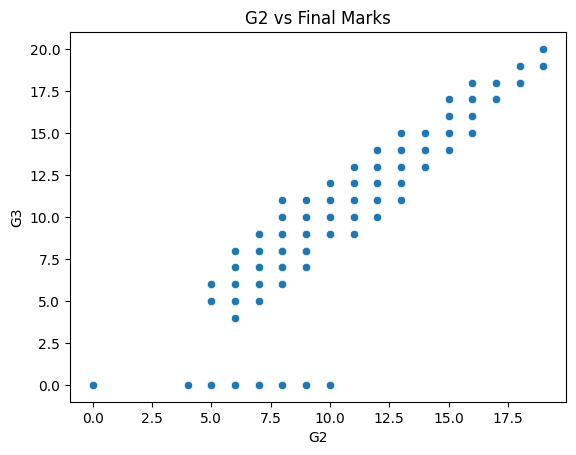

In [14]:
#Internal Marks vs Final Mark
sns.scatterplot(x="G1", y="G3", data=df)
plt.title("G1 vs Final Marks")
plt.show()

sns.scatterplot(x="G2", y="G3", data=df)
plt.title("G2 vs Final Marks")
plt.show()




6. EDA Summary
- Study time positively affects performance  
- Higher absences increase failure chances  
- Previous academic performance (G1, G2) strongly impacts final result  
- Gender has minimal influence compared to academic factors  


7. Data Preprocessing

In [15]:
#Feature Selection
features = ["sex", "studytime", "absences", "failures", "famsup", "schoolsup", "G1", "G2"]
X = df[features]
y = df["pass_fail"]


In [17]:
#Encode Categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X["sex"] = le.fit_transform(X["sex"])
X["famsup"] = le.fit_transform(X["famsup"])
X["schoolsup"] = le.fit_transform(X["schoolsup"])


/tmp/ipython-input-361114288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sex"] = le.fit_transform(X["sex"])
/tmp/ipython-input-361114288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["famsup"] = le.fit_transform(X["famsup"])
/tmp/ipython-input-361114288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [19]:
X.head()


,sex,studytime,absences,failures,famsup,schoolsup,G1,G2
0,0,2,6,0,0,1,5,6
1,0,2,4,0,1,0,5,5
2,0,2,10,3,0,1,7,8
3,0,3,2,0,1,0,15,14
4,0,2,4,0,1,0,6,10


In [20]:
y.value_counts()

,count
pass_fail,
1,265
0,130


8. Train–Test Split

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


9. Prediction Model (Logistic Regression)


In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

10. Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score


In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8987341772151899

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)



array([[25,  2],
       [ 6, 46]])

11. Insights & Conclusion
- The Logistic Regression model predicts student performance with good accuracy.
- Study time and internal marks strongly influence final results.
- Higher absences increase the chance of failure.
- The model can help identify students at risk early.


 12. Model Improvement - Decision Tree

In [30]:
#rain Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [32]:
#Evaluate Decision Tree
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_accuracy


0.8860759493670886

In [33]:
print("Logistic Regression Accuracy:", accuracy)
print("Decision Tree Accuracy:", dt_accuracy)


Logistic Regression Accuracy: 0.8987341772151899
Decision Tree Accuracy: 0.8860759493670886


Insights & Conclusion
- Logistic Regression performed slightly better than Decision Tree.
- Logistic Regression generalizes better for this dataset.
- Decision Tree is easier to interpret but can overfit.
